# I. Numpy

### Импортируйте NumPy

In [1]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [4]:
null_list = np.zeros(10)
null_list[5-1]= 1
null_list.reshape(2,5)

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [16]:
rnd_list = np.array([i for i in range(10,50)])
rnd_list = rnd_list[::-1]
equals_num = np.where(rnd_list % 2 == 1)
equals_num

(array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38], dtype=int64),)

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [21]:
cube_list = np.array([i for i in range(0,9)])
cube_list.reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [24]:
target_list = np.random.rand(4,3,2)
max_num = target_list.max()
min_num = target_list.min()
max_num
min_num

0.9918360831774791

### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [29]:
A_matrix = np.random.rand(6,4)
B_matrix = np.random.rand(4,3)
np.matmul(A_matrix,B_matrix)

array([[0.95937756, 1.45910701, 0.60589263],
       [1.03143161, 1.82773062, 0.66925401],
       [1.15235067, 1.41746813, 0.42482018],
       [0.4486177 , 0.62088081, 0.2865902 ],
       [0.7653994 , 0.69670775, 0.21985291],
       [0.57792848, 0.63655803, 0.25018301]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [34]:
target_matrix = np.random.rand(7,7)
target_list.std()
target_list.mean()
# Нормализация
# TODO: оформить в виде функции
result = np.linalg.norm(target_matrix)
new_output=target_matrix/result
new_output

array([[0.11294279, 0.16863789, 0.18247938, 0.01761114, 0.20877931,
        0.03910371, 0.03934049],
       [0.20345976, 0.10446659, 0.18516644, 0.24023144, 0.2402854 ,
        0.17266007, 0.14369969],
       [0.06154111, 0.10367875, 0.01986414, 0.19330752, 0.03622388,
        0.22158641, 0.04751573],
       [0.11286293, 0.17590481, 0.24546447, 0.23959707, 0.06681334,
        0.12229399, 0.04345632],
       [0.01229844, 0.09366552, 0.11512181, 0.02175875, 0.06181664,
        0.00392658, 0.03427404],
       [0.09916948, 0.07510147, 0.23481468, 0.14746569, 0.12821502,
        0.24204517, 0.02884033],
       [0.1759305 , 0.23537043, 0.06694723, 0.01272344, 0.2048651 ,
        0.00938686, 0.09735212]])

# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import matplotlib
import  seaborn as sns

### Загрузите датасет Tips из набора датасетов seaborn

In [2]:
dataset = sns.load_dataset("tips")

### Посмотрите на первые 5 строчек

In [3]:
dataset.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [4]:
dataset.shape

(244, 7)

### Проверьте есть ли пропуски в данных

In [5]:
missing_values = dataset.isnull().sum()
missing_values

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

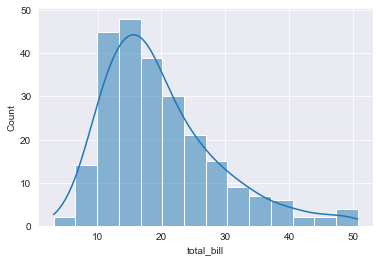

In [6]:
sns.histplot(data=dataset, x='total_bill', kde=True)

### Найдите максимальное значение 'total_bill'

In [7]:
dataset['total_bill'].max()

50.81

### Найдите количество курящих людей

In [8]:
non_smokers_count = dataset[dataset['smoker'] == 'No']['smoker'].value_counts()
non_smokers_count

No     151
Yes      0
Name: smoker, dtype: int64

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [9]:
mean_total_bill_by_day = dataset.groupby('day')['total_bill'].mean()
mean_total_bill_by_day

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [10]:
median_total_bill = dataset['total_bill'].median()
selected_rows = dataset.loc[dataset['total_bill'] > median_total_bill]
mean_tip_by_sex = selected_rows.groupby('sex')['tip'].mean()
mean_tip_by_sex

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [11]:
dataset['smoker'] = dataset['smoker'].map({'No': 0, 'Yes': 1})

# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

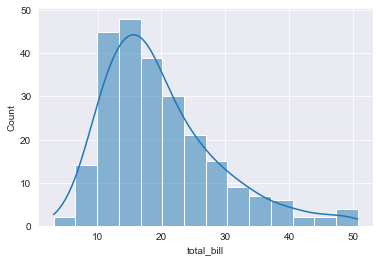

In [12]:
sns.histplot(data=dataset, x='total_bill', kde=True)

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

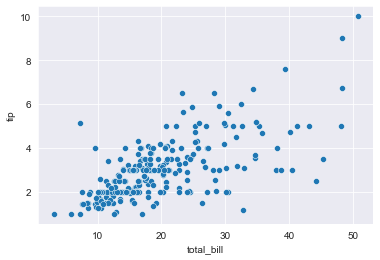

In [13]:
sns.scatterplot(data=dataset, x="total_bill", y="tip")

### Постройте pairplot

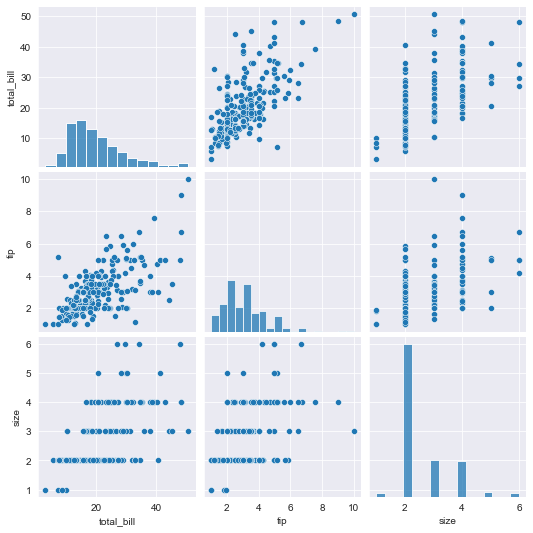

In [14]:
sns.pairplot(dataset)

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

<AxesSubplot:xlabel='total_bill', ylabel='day'>

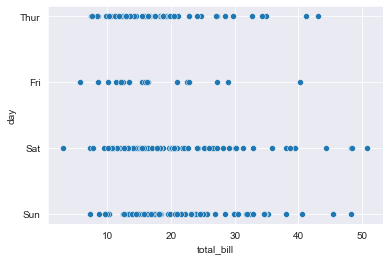

In [15]:
sns.scatterplot(data=dataset, x="total_bill", y="day")

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

<AxesSubplot:xlabel='tip', ylabel='time'>

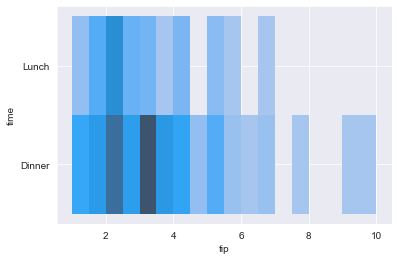

In [17]:
sns.histplot(data=dataset, x='tip',y='time', kde=True)

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

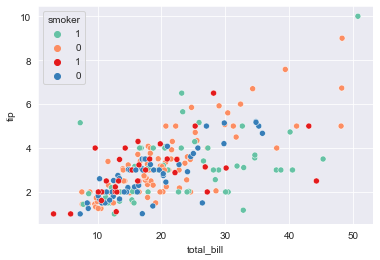

In [21]:
male_data = dataset[dataset['sex'] == 'Male']
female_data = dataset[dataset['sex'] == 'Female']

sns.scatterplot(x='total_bill', y='tip', hue='smoker', data=male_data, palette='Set2')
sns.scatterplot(x='total_bill', y='tip', hue='smoker', data=female_data, palette='Set1')


## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

Если смотреть на чаевые в зависимости от дня, то чаевые оставляют больше в выходные. Если смотреть на чаевые кто больше оставляет - мужчины. Имеется тенденция что чем больше общий счёт - тем больше чаевые, имеет смысл повышать средний чек заказа для получения большей прибыли.